In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

Relate against 

GDP
https://ycharts.com/indicators/us_monthly_gdp

Inflation
https://fred.stlouisfed.org/series/CUUR0000SAH1

Interest Rates 
https://fred.stlouisfed.org/series/MORTGAGE30US

Covid 
https://ourworldindata.org/coronavirus/country/united-states

U6 unemployment
https://ycharts.com/indicators/us_u_6_unemployment_rate_unadjusted

The US U-6 Unemployment Rate measures the total number of employees in the United States that are a part of the labor force, but are without a job. Unemployment rates can be a good gauge for how the economy is performing in a particular region. Historically, the US U-6 Unemployment Rate reached as high as 18% in 2010. The U-6 rate differs from the more commonly reported U-3 rate in that it also includes workers that are discouraged and underemployed. This might give a better idea on how to US economy is functioning, since it captures a larger labor force.

In [24]:
correlation_df = pd.read_excel("Data\\Correlation data.xlsx", header=0)
covid_df = pd.read_excel("Data\\Misc Data\\owid-covid-data.xlsx",header=0)
inflation_df = pd.read_excel("Data\\Misc Data\\Inflation Shelter.xls", skiprows=10, header=0)
inflation_df = inflation_df.iloc[:, [0, 2]]
gdp_df = pd.read_excel("Data\\Misc Data\\GDP Rel Growth.xlsx")
interest_df = pd.read_excel("Data\\Misc Data\\MORTGAGE30US.xls", skiprows = 10, header=0)
unemployment_df = pd.read_excel("Data\\Misc Data\\U6 unemployment.xlsx", header=None)

In [178]:
covid_df

,date,new_cases_smoothed
0,2020-01-08,0.000
1,2020-01-09,0.000
2,2020-01-10,0.000
3,2020-01-11,0.000
4,2020-01-12,0.000
...,...,...
1224,2023-05-16,13322.857
1225,2023-05-17,13322.857
1226,2023-05-18,13322.857
1227,2023-05-19,13322.857


In [25]:
#Normalize all data
#Correlation
correlation_df['Correlation'] = correlation_df['Correlation']/max(correlation_df['Correlation'])
correlation_df.columns = ['date', 'Correlation']
date_range = pd.date_range(start=correlation_df['date'].min(), end=correlation_df['date'].max(), freq='D')
correlation_df = correlation_df.set_index('date').reindex(date_range).reset_index()
correlation_df['Correlation'] = correlation_df['Correlation'].ffill()
#Inflation (Shelter)
inflation_df.iloc[0, 1] = 0
inflation_df['change'] = inflation_df['change']/max(abs(inflation_df['change']))
inflation_df.columns = ['date', 'Inflation']
date_range = pd.date_range(start=inflation_df['date'].min(), end=inflation_df['date'].max(), freq='D')
inflation_df = inflation_df.set_index('date').reindex(date_range).reset_index()
inflation_df['Inflation'] = inflation_df['Inflation'].ffill()
#GDP
gdp_df.iloc[0, 1] = 0
gdp_df.iloc[:, 1] = gdp_df.iloc[:, 1]/max(abs(gdp_df.iloc[:, 1]))
gdp_df.columns = ['date', 'GDP']
date_range = pd.date_range(start=gdp_df['date'].min(), end=gdp_df['date'].max(), freq='D')
gdp_df = gdp_df.set_index('date').reindex(date_range).reset_index()
gdp_df['GDP'] = gdp_df['GDP'].ffill()
#Covid
covid_df['new_cases_smoothed'] = covid_df['new_cases_smoothed']/max(covid_df['new_cases_smoothed'])
covid_df.columns = ['index', 'Covid_cases']
#date_range = pd.date_range(start=covid_df['date'].min(), end=covid_df['date'].max(), freq='D')
#covid_df = covid_df.set_index('date').reindex(date_range).reset_index()
#covid_df['Covid_cases'] = covid_df['Covid_cases'].ffill()
#Unemployment
unemployment_df.iloc[:, 1] = unemployment_df.iloc[:, 1]/max(unemployment_df.iloc[:, 1])
unemployment_df.columns = ['date', 'Unemployment']
date_range = pd.date_range(start=unemployment_df['date'].min(), end=unemployment_df['date'].max(), freq='D')
unemployment_df = unemployment_df.set_index('date').reindex(date_range).reset_index()
unemployment_df['Unemployment'] = unemployment_df['Unemployment'].ffill()
#Interest
interest_df.iloc[:, 1] = interest_df.iloc[:, 1]/max(interest_df.iloc[:, 1])
interest_df.columns = ['date', 'Interest']
date_range = pd.date_range(start=interest_df['date'].min(), end=interest_df['date'].max(), freq='D')
interest_df = interest_df.set_index('date').reindex(date_range).reset_index()
interest_df['Interest'] = interest_df['Interest'].ffill()

In [13]:
interest_df

,index,Interest
0,2018-12-06,0.609756
1,2018-12-07,0.609756
2,2018-12-08,0.609756
3,2018-12-09,0.609756
4,2018-12-10,0.609756
...,...,...
1816,2023-11-26,0.935815
1817,2023-11-27,0.935815
1818,2023-11-28,0.935815
1819,2023-11-29,0.935815


In [26]:
mega_df = correlation_df
mega_df = pd.merge(mega_df, inflation_df, on='index', how='right')
mega_df = pd.merge(mega_df, gdp_df, on='index', how='right')
mega_df = pd.merge(mega_df, covid_df, on='index', how='right')
mega_df = pd.merge(mega_df, unemployment_df, on='index', how='right')
mega_df = pd.merge(mega_df, interest_df, on='index', how='right')

#Good time range
mega_df = mega_df.iloc[398:1626, :]
mega_df.reset_index(drop=True)
mega_df['index'] = mega_df['index'].dt.strftime('%m/%d/%Y')
#Change datetime to just be mdy
#for i in range(mega_df['index'].__len__()):
#    mega_df.iloc[i, 0].strftime("%m/%d%Y")

In [5]:
correlation_df

,index,Correlation
0,2019-12-03,0.548331
1,2019-12-04,0.547492
2,2019-12-05,0.546546
3,2019-12-06,0.544564
4,2019-12-07,0.544564
...,...,...
1455,2023-11-27,0.586207
1456,2023-11-28,0.587158
1457,2023-11-29,0.588336
1458,2023-11-30,0.589201


In [40]:
correl_diff = np.zeros(mega_df['Correlation'].__len__())
for i in range(1, mega_df['index'].__len__()):
    correl_diff[i] = (correlation_df['Correlation'][i] - correlation_df['Correlation'][i-1])/correlation_df['Correlation'][i-1]     
correl_diff = correl_diff/(max(np.abs(correl_diff)))
mega_df['Correlation Diff'] = correl_diff
mega_df['Correlation Diff'] = mega_df['Correlation Diff'].replace(0, np.NaN).ffill()


In [41]:
mega_df

,index,Correlation,Inflation,GDP,Covid_cases,Unemployment,Interest,Correlation Diff
398,01/08/2020,0.532779,0.505390,0.023437,0.000000,0.299107,0.477535,NaN
399,01/09/2020,0.534095,0.505390,0.023437,0.000000,0.299107,0.467266,-0.049535
400,01/10/2020,0.532596,0.505390,0.023437,0.000000,0.299107,0.467266,-0.055903
401,01/11/2020,0.532596,0.505390,0.023437,0.000000,0.299107,0.467266,-0.117409
402,01/12/2020,0.532596,0.505390,0.023437,0.000000,0.299107,0.467266,-0.117409
...,...,...,...,...,...,...,...,...
1621,05/15/2023,0.630820,0.717927,0.022956,0.016453,0.272321,0.815148,-0.251517
1622,05/16/2023,0.632589,0.717927,0.022956,0.016453,0.272321,0.815148,-0.099457
1623,05/17/2023,0.634436,0.717927,0.022956,0.016453,0.272321,0.815148,-0.182359
1624,05/18/2023,0.633898,0.717927,0.022956,0.016453,0.272321,0.820282,-0.021590


IndexError: index 6 is out of bounds for axis 0 with size 6

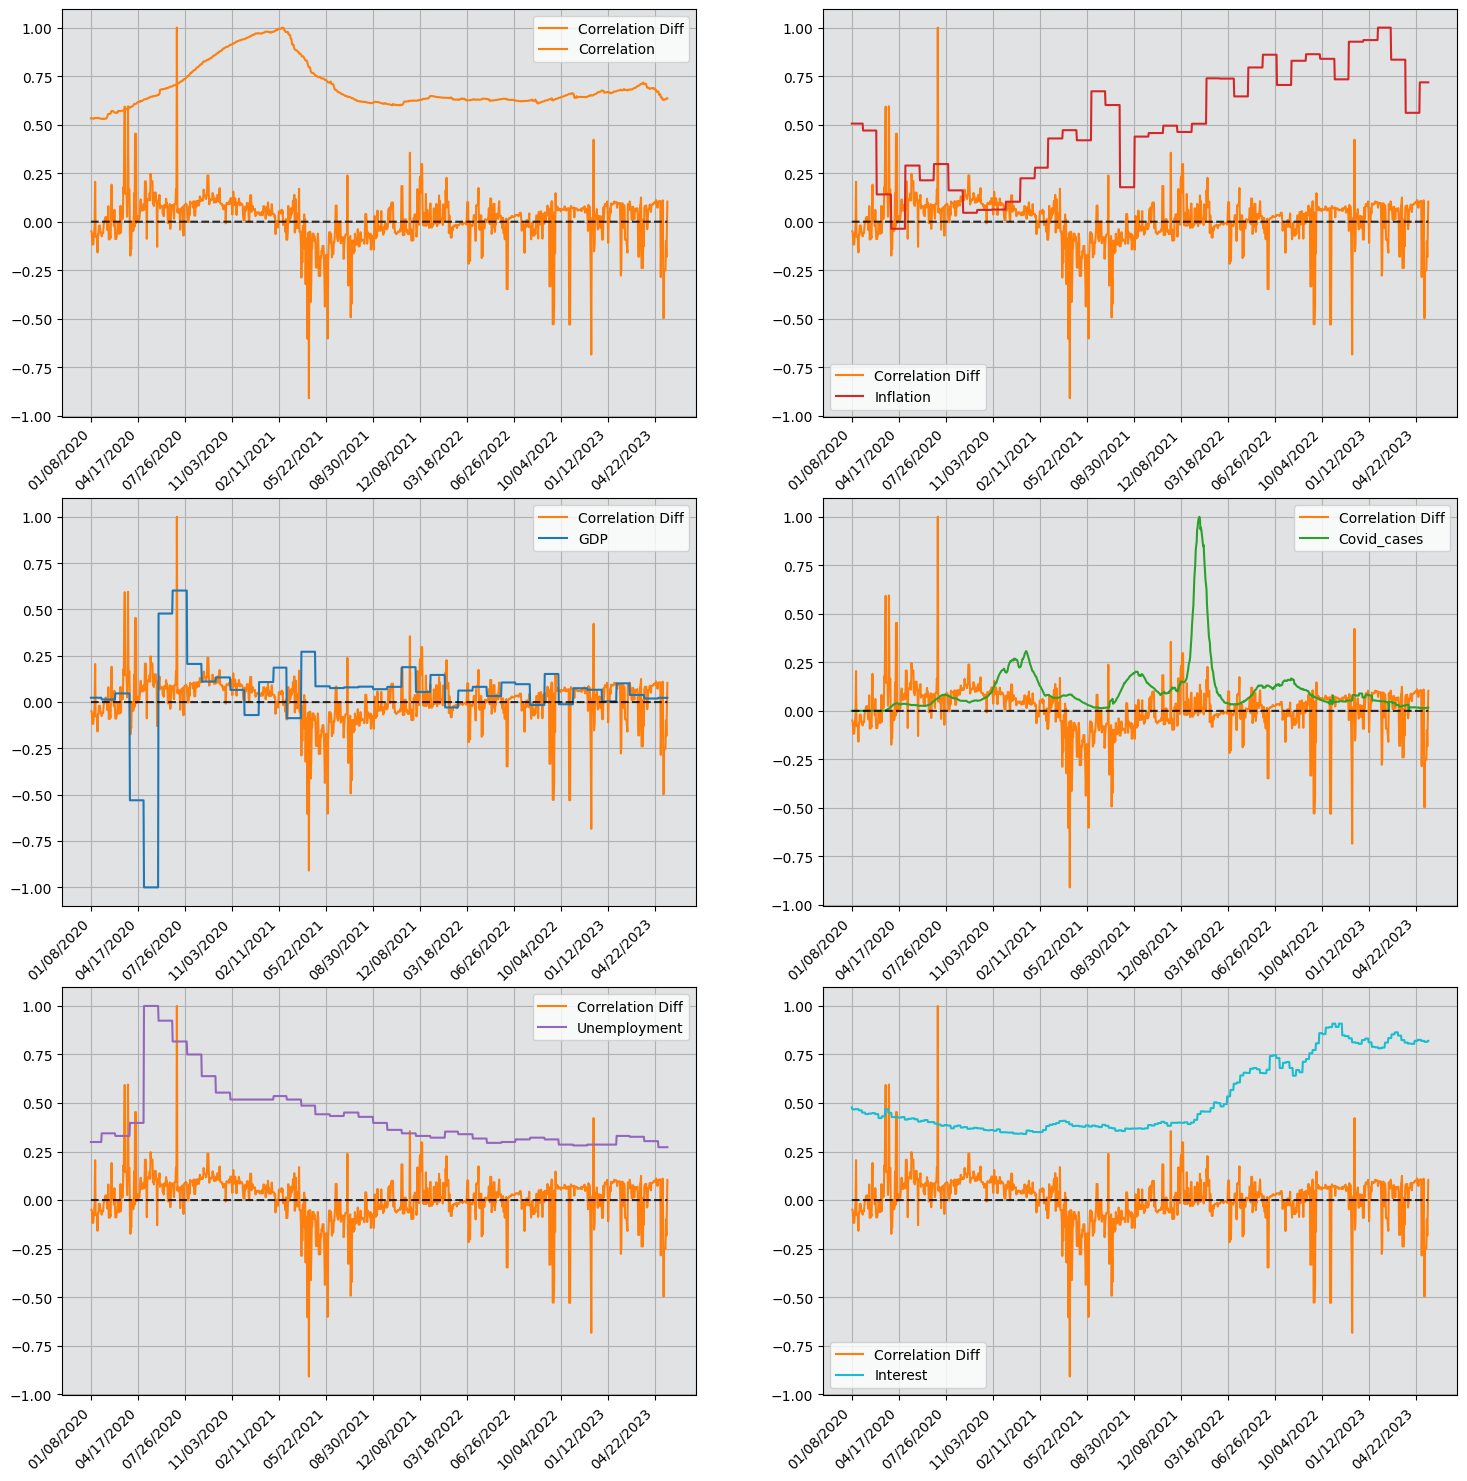

In [42]:
fig, axs = plt.subplots(3, 2, figsize =(18, 18))
axs= axs.flat
colors = ['tab:orange', 'tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:cyan']
xticks_positions = mega_df['index'][::100]
for i, index in enumerate(mega_df.columns[1:]):
    axs[i].plot(mega_df['index'], mega_df['Correlation Diff'], c = colors[0], label='Correlation Diff')
    axs[i].plot(mega_df['index'], mega_df[f'{index}'], c = colors[i], label=f'{index}')
    axs[i].plot(mega_df['index'], np.zeros(len(mega_df['index'])), c = 'k', linestyle = '--', alpha = 0.8)
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_facecolor("#e1e2e3")
    #axs[i].set_ylim(max(-0.1, min(mega_df[f'{index}']))-0.05 , 1.1)
    axs[i].set_xticks(xticks_positions, )
    #axs[i].set_xlim(mega_df['index'].min(), mega_df['index'].max())
    axs[i].set_xticklabels(xticks_positions, rotation = 45, ha= 'right')
plt.show()
plt.tight_layout(pad=3)